HALF ADDER

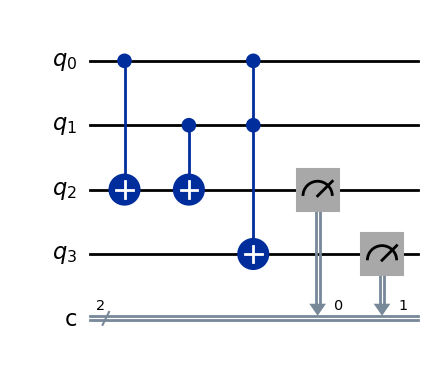

In [11]:
from qiskit import QuantumCircuit
qc1 = QuantumCircuit(4,2)


# use cnots to write the XOR of the inputs on qubit 2
qc1.cx(0,2)
qc1.cx(1,2)

# use ccx to write the AND of the inputs on qubit 3
qc1.ccx(0,1,3)
# extract outputs
qc1.measure(2,0) # extract XOR value
qc1.measure(3,1) # extract AND value

qc1.draw(output='mpl')

FULL ADDER

In [9]:
def full_adder(a, b, cin):
    sum_out = (a ^ b) ^ cin  # Sum output
    carry_out = (a & b) | (b & cin) | (a & cin)  # Carry output
    return sum_out, carry_out

# Generate the truth table
print("A B Cin | Sum Carry")
print("------------------")
for a in [0, 1]:
    for b in [0, 1]:
        for cin in [0, 1]:
            s, c = full_adder(a, b, cin)
            print(f"{a} {b}  {cin}  |  {s}    {c}")

A B Cin | Sum Carry
------------------
0 0  0  |  0    0
0 0  1  |  1    0
0 1  0  |  1    0
0 1  1  |  0    1
1 0  0  |  1    0
1 0  1  |  0    1
1 1  0  |  0    1
1 1  1  |  1    1


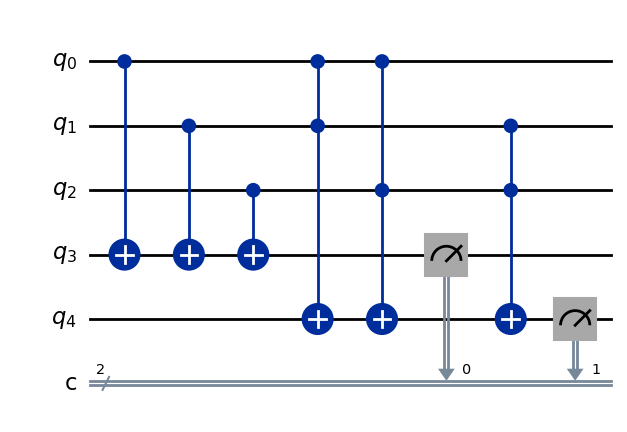

In [12]:


# Create a quantum circuit with 5 qubits (A, B, Cin, Sum, Cout)
qc = QuantumCircuit(5, 2)

# Compute SUM = A ⊕ B ⊕ Cin using three CNOT (CX) gates
qc.cx(0, 3)  # A → Sum
qc.cx(1, 3)  # B → Sum
qc.cx(2, 3)  # Cin → Sum

# Compute CARRY = A⋅B + Cin⋅(A ⊕ B) using Toffoli (CCX) gates
qc.ccx(0, 1, 4) 
qc.ccx(0,2,4)
qc.ccx(1,2, 4)
qc.measure(3, 0) 
qc.measure(4, 1)
# Draw the circuit
qc.draw('mpl')


IRREVERSIBLE

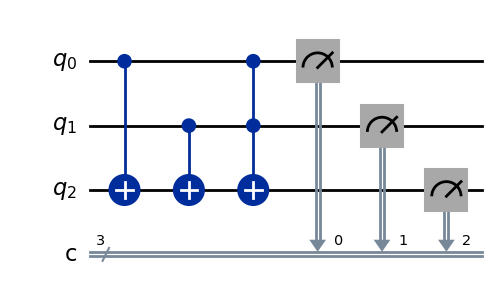

In [8]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 3 qubits (A, B, Cin)
qc = QuantumCircuit(3, 3)  # 3 qubits, 3 classical bits for measurement

# Compute SUM = A ⊕ B ⊕ Cin using CNOT (XOR) gates
qc.cx(0, 2)  # XOR A with Cin
qc.cx(1, 2)  # XOR B with Cin (Final Sum)

# Compute CARRY = A ⋅ B using Toffoli (AND) gate
qc.ccx(0, 1, 2)  # Carry stored in Cin (overwrites Cin)

# Measure the qubits (not truly a full adder since we lose input data)
qc.measure([0, 1, 2], [0, 1, 2])

# Draw the circuit
qc.draw('mpl')
